## **Mengimport Modul**

In [134]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


## **Membaca Data**

In [110]:
data = pd.read_csv("../Data/hypertension_data.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


## **Preprocessing Data**

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26083 entries, 0 to 26082
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       26083 non-null  float64
 1   sex       26058 non-null  float64
 2   cp        26083 non-null  int64  
 3   trestbps  26083 non-null  int64  
 4   chol      26083 non-null  int64  
 5   fbs       26083 non-null  int64  
 6   restecg   26083 non-null  int64  
 7   thalach   26083 non-null  int64  
 8   exang     26083 non-null  int64  
 9   oldpeak   26083 non-null  float64
 10  slope     26083 non-null  int64  
 11  ca        26083 non-null  int64  
 12  thal      26083 non-null  int64  
 13  target    26083 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.8 MB


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,26083.0,55.661389,15.189768,11.0,44.0,56.0,67.0,98.0
sex,26058.0,0.500000,0.500010,0.0,0.0,0.5,1.0,1.0
cp,26083.0,0.958594,1.023931,0.0,0.0,1.0,2.0,3.0
trestbps,26083.0,131.592992,17.588809,94.0,120.0,130.0,140.0,200.0
chol,26083.0,246.246061,51.643522,126.0,211.0,240.0,275.0,564.0
fbs,26083.0,0.149753,0.356836,0.0,0.0,0.0,0.0,1.0
restecg,26083.0,0.526512,0.525641,0.0,0.0,1.0,1.0,2.0
thalach,26083.0,149.655024,22.858109,71.0,133.0,153.0,166.0,202.0
exang,26083.0,0.326573,0.468969,0.0,0.0,0.0,1.0,1.0
oldpeak,26083.0,1.039512,1.165138,0.0,0.0,0.8,1.6,6.2


In [113]:
##Mengecek nilai kosong (missing value)
data.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [114]:
data = data.dropna()
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [115]:
##Menghapus data duplikat
data.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26078,72.0,0.0,0,138,294,1,1,106,0,1.9,1,3,2,0
26079,60.0,1.0,0,144,200,0,0,126,1,0.9,1,0,3,0
26080,68.0,1.0,0,100,234,0,1,156,0,0.1,2,1,3,0
26081,67.0,1.0,1,154,232,0,0,164,0,0.0,2,1,2,0


In [116]:
##Mengubah tipe kolom
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
data[categorical_columns] = data[categorical_columns].astype('category')

In [117]:
##Menyeleksi variabel (feature selection)
X = data.drop(["target"], axis = 1)
y = data["target"]

estimator = DecisionTreeClassifier(max_depth=5,min_samples_split=100)
rfecv = RFECV(estimator=estimator, cv=StratifiedKFold(10, random_state=42, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
      estimator=DecisionTreeClassifier(max_depth=5, min_samples_split=100),
      scoring='accuracy')

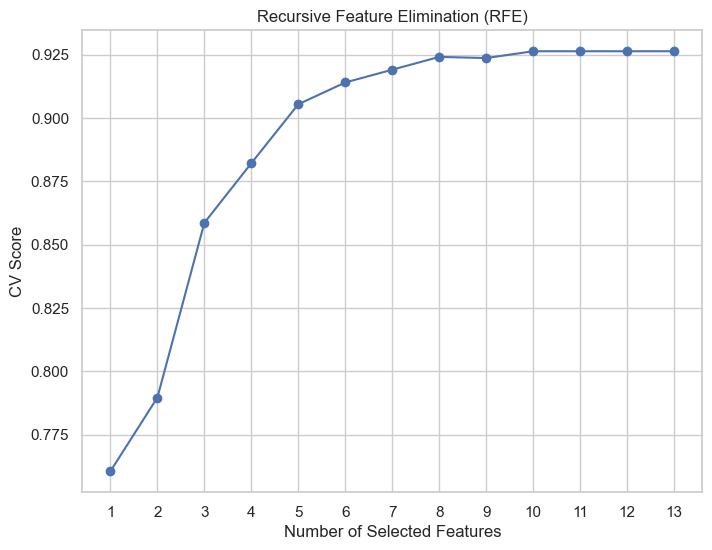

The optimal number of features: 10


In [118]:
##Plot RFE
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], marker='o')
plt.xticks(range(1, X.shape[1] + 1))
plt.xlabel("Number of Selected Features")
plt.ylabel("CV Score")
plt.title("Recursive Feature Elimination (RFE)")
plt.show()

print("The optimal number of features: {}".format(rfecv.n_features_))

In [119]:
##Prediktor terpilih
selected_features = X.columns[rfecv.support_]
X_selected = X[selected_features]

In [120]:
X_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26058 entries, 0 to 26082
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   cp        26058 non-null  category
 1   trestbps  26058 non-null  int64   
 2   chol      26058 non-null  int64   
 3   restecg   26058 non-null  category
 4   thalach   26058 non-null  int64   
 5   exang     26058 non-null  category
 6   oldpeak   26058 non-null  float64 
 7   slope     26058 non-null  category
 8   ca        26058 non-null  category
 9   thal      26058 non-null  category
dtypes: category(6), float64(1), int64(3)
memory usage: 1.1 MB


c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


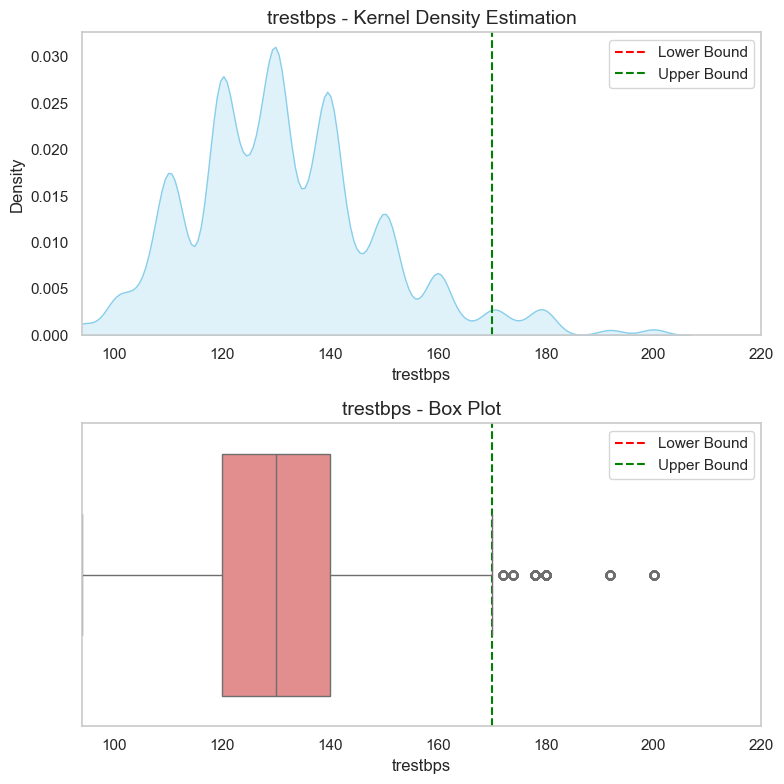

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


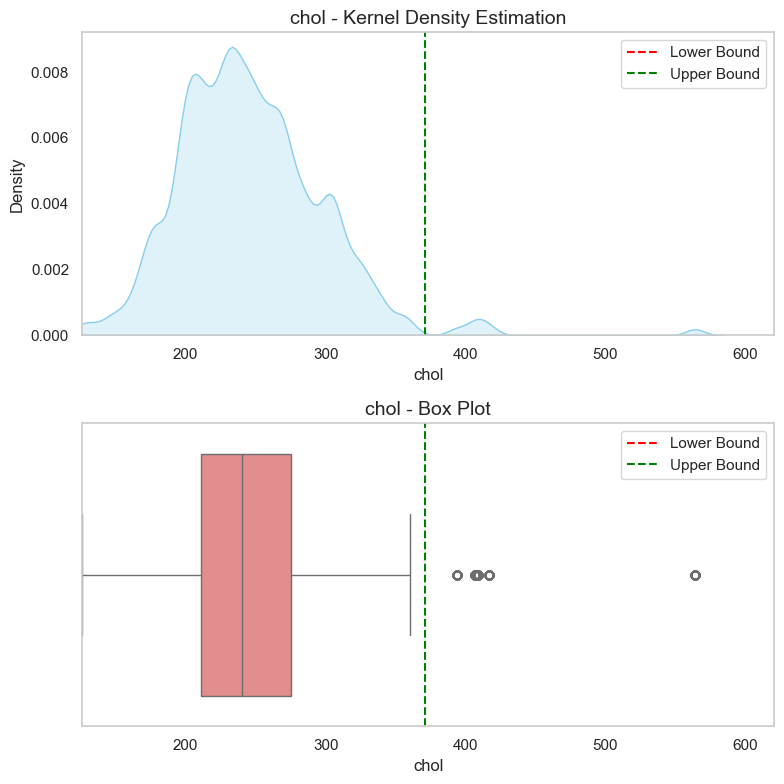

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


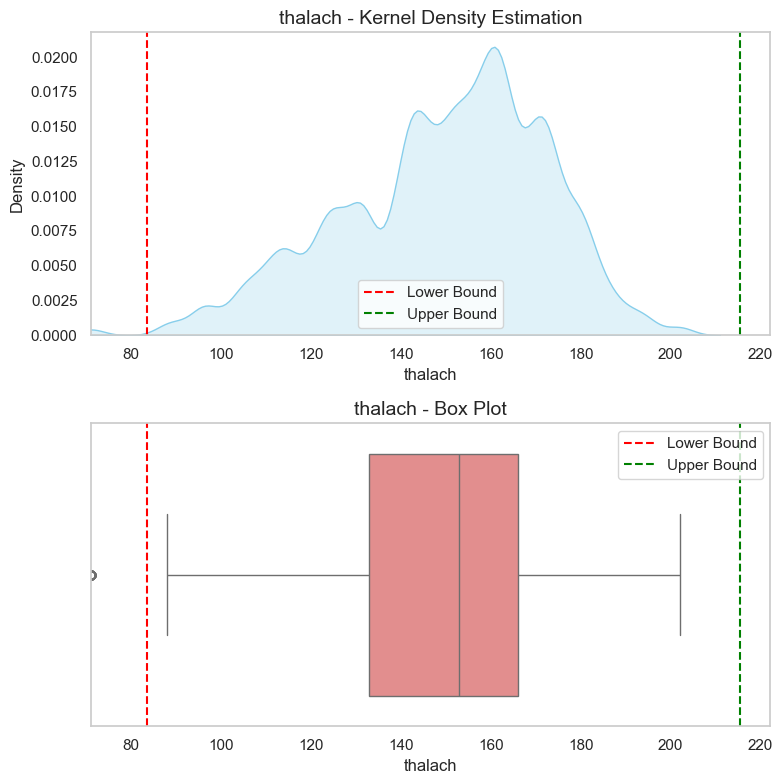

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


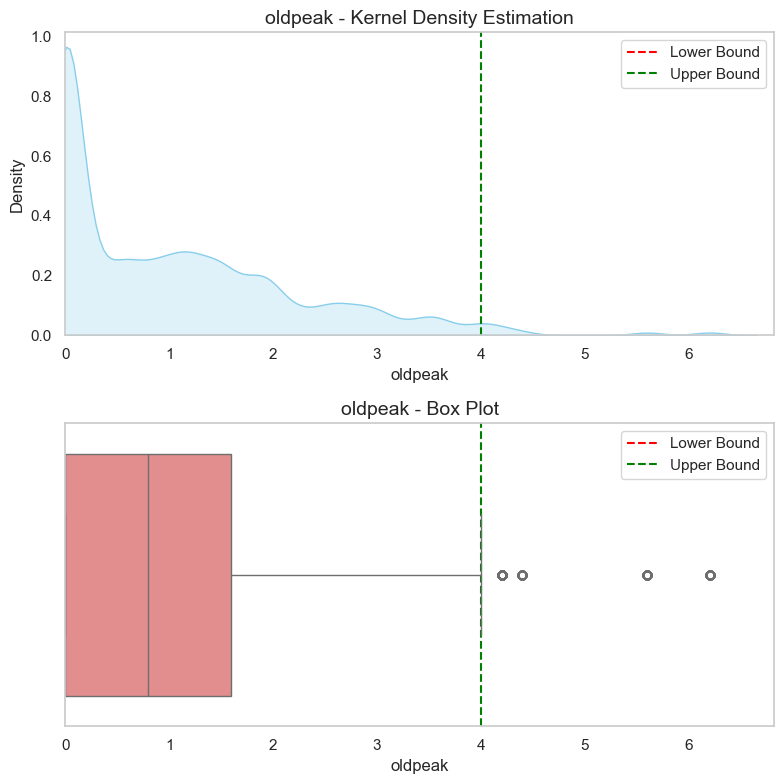

In [121]:
##Mengecek outlier
numerical_columns = X_selected.select_dtypes(include=['float64', 'int64']).columns

for i in numerical_columns:
    q25, q75 = np.percentile(data[i], [25, 75])
    iqr = q75 - q25
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5

    plt.figure(figsize=(8, 8))

    plt.subplot(211)
    plt.xlim(data[i].min(), data[i].max() * 1.1)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
    sns.kdeplot(data[i], fill=True, color='skyblue')
    plt.legend()
    plt.title(f'{i} - Kernel Density Estimation', fontsize=14)
    plt.grid(False) 

    plt.subplot(212)
    plt.xlim(data[i].min(), data[i].max() * 1.1)
    plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(x=upper_bound, color='green', linestyle='--', label='Upper Bound')
    sns.boxplot(x=data[i], color='lightcoral')
    plt.legend()
    plt.title(f'{i} - Box Plot', fontsize=14)
    plt.grid(False) 
    
    plt.tight_layout() 
    plt.show()


In [122]:
##Menghapus outlier
columns_to_check = ['trestbps', 'chol', 'oldpeak']

for i in columns_to_check:
    q25, q75 = np.percentile(data[i], [25, 75])
    iqr = q75 - q25
    
    lower_bound = q25 - iqr * 1.5
    upper_bound = q75 + iqr * 1.5
    
    data.loc[data[i] < lower_bound, i] = lower_bound
    data.loc[data[i] > upper_bound, i] = upper_bound

c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\acer\AppData\Local\Programs\Python\Python311\Lib

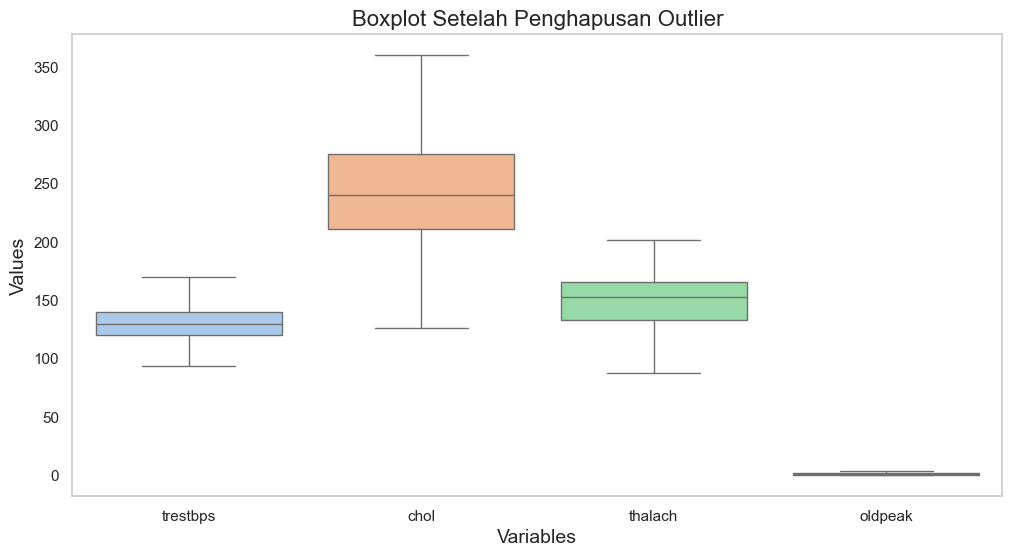

In [123]:
##Mengecek outlier setelah dihapus
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))  

boxplot = sns.boxplot(data=X_selected, palette='pastel', showfliers=False)
plt.title('Boxplot Setelah Penghapusan Outlier', fontsize=16)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(False)

In [124]:
##Mengecek target
data['target'].value_counts()

target
1    14274
0    11784
Name: count, dtype: int64

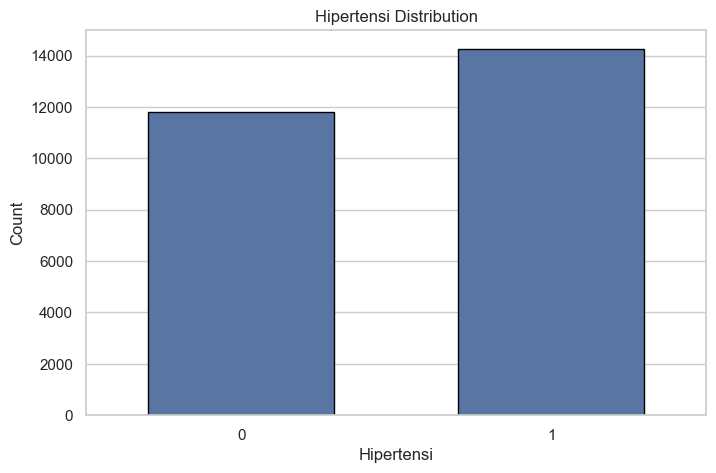

In [125]:
plt.figure(figsize=(8, 5))
sns.countplot(x="target", data=data, width=0.6, edgecolor="black")  
plt.xticks([0, 1])       
plt.xlabel("Hipertensi")
plt.ylabel("Count")
plt.title("Hipertensi Distribution")
plt.show()

In [126]:
##Membagi data (splitting data)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

In [127]:
y_train.value_counts()

target
1    9991
0    8249
Name: count, dtype: int64

In [128]:
##Mengatasi imbalance data
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [129]:
y_train.value_counts()

target
0    9991
1    9991
Name: count, dtype: int64

In [130]:
y_test.value_counts()

target
1    4283
0    3535
Name: count, dtype: int64

In [131]:
##Menstandarisasi data
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## **Melakukan Klasifikasi**

In [132]:
xg = XGBClassifier(n_estimators=350)
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)
print(classification_report(y_test, xg_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3535
           1       1.00      1.00      1.00      4283

    accuracy                           1.00      7818
   macro avg       1.00      1.00      1.00      7818
weighted avg       1.00      1.00      1.00      7818



## **Membuat Confussion Matrix**

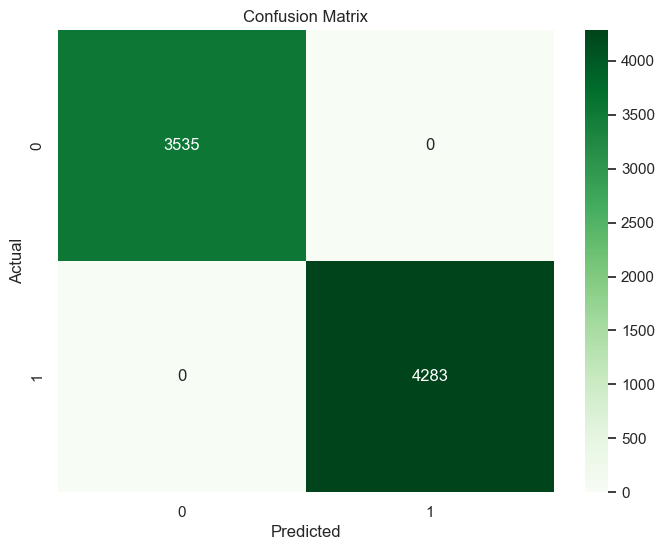

In [133]:
##Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, xg_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
